In [1]:
#Plants dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
# 1. Загрузка данных и объединение

In [4]:
accounts = pd.read_csv('Accounts.csv')
plant_h = pd.read_csv('Plant Hierarchy.csv')
plant_dts = pd.read_csv('Plant_DTS.csv')

print("Размеры:")
print("Accounts:", accounts.shape)
print("Plant Hierarchy:", plant_h.shape)
print("Plant_DTS:", plant_dts.shape)

print("\nПример данных Accounts:")
display(accounts.head())

print("\nПример данных Plant Hierarchy:")
display(plant_h.head())

print("\nПример данных Plant_DTS:")
display(plant_dts.head())

Размеры:
Accounts: (1744, 10)
Plant Hierarchy: (1000, 8)
Plant_DTS: (2440, 7)

Пример данных Accounts:


,country_code,Account,Master_id,Account_id,latitude2,longitude,country2,Postal_code,street_name,Street_number
0,CA,"Gerlach, Cassin and Parker",1599,1599-E6G-78670,45.989139,-67.241222,Canada,E6G,Oneill,78670
1,CN,Ziemann LLC,1227,1227--40,37.943121,115.217658,China,0,Kipling,40
2,CN,"Medhurst, Aufderhar and Mosciski",1857,1857--758,26.170171,118.190467,China,0,Glendale,758
3,AR,Larson-Fritsch,1793,1793-6140-77,-33.916294,-64.389795,Argentina,6140,Manley,77
4,MX,Jast-Quigley,1725,1725-40230-69,18.559181,-99.598300,Mexico,40230,Leroy,69



Пример данных Plant Hierarchy:


,Product_Family,Product_Family_Id,Product_Group,Product_Group_id,Product_Name,Product_Name_id,Product_Size,Produt_Type
0,Cucurbitaceae,1051,Gray's Bur Cucumber,3293,Chamaesyce celastroides (Boiss.) Croizat & O. ...,2000,Small,Landscape
1,Platanaceae,1138,Arizona Sycamore,3658,Tetraplasandra waimeae Wawra,2001,Medium,Outdoor
2,Scrophulariaceae,1167,Little Elephantshead,3876,Iris √ónelsonii Randolph,2002,Small,Outdoor
3,Euphorbiaceae,1065,'ekoko,3357,Acanthus L.,2003,Large,Outdoor
4,Amaranthaceae,1006,Philoxerus,3017,Aplectrum hyemale (Muhl. ex Willd.) Torr.,2004,Medium,Landscape



Пример данных Plant_DTS:


,Product_id,Sales_USD,quantity,Price_USD,COGS_USD,Date_Time,Account_id
0,2625,16156.56,502.00,32.184382,14104.67688,3/29/2024,1599-E6G-78670
1,2569,13831.29,679.92,20.342526,10470.28653,7/13/2022,1227--40
2,2195,17402.14,925.66,18.799710,10528.29470,4/5/2023,1857--758
3,2530,15866.42,809.78,19.593495,12883.53304,9/24/2022,1793-6140-77
4,2889,6200.48,311.43,19.909707,5388.21712,10/19/2023,1725-40230-69


In [5]:
plant_dts["Date_Time"] = pd.to_datetime(plant_dts["Date_Time"], errors="coerce")

In [6]:
# Объединяем и добавляем продуктовые характеристики
df = plant_dts.merge(accounts, on="Account_id", how="left")
df = df.merge(plant_h, left_on="Product_id", right_on="Product_Name_id", how="left")
print("\nОбщий датасет:")
display(df.head())
print("\nИнформация о датасете:")
print(df.info())


Общий датасет:


,Product_id,Sales_USD,quantity,Price_USD,COGS_USD,Date_Time,Account_id,country_code,Account,Master_id,...,street_name,Street_number,Product_Family,Product_Family_Id,Product_Group,Product_Group_id,Product_Name,Product_Name_id,Product_Size,Produt_Type
0,2625,16156.56,502.00,32.184382,14104.67688,2024-03-29,1599-E6G-78670,CA,"Gerlach, Cassin and Parker",1599,...,Oneill,78670,Onagraceae,1122,New Mexico Beeblossom,3600,"Lycopodium hickeyi W.H. Wagner, Beitel & Moran",2625,Medium,Landscape
1,2569,13831.29,679.92,20.342526,10470.28653,2022-07-13,1227--40,CN,Ziemann LLC,1227,...,Kipling,40,Myrtaceae,1117,Mountainbay,3577,Allium cernuum Roth var. neomexicanum (Rydb.) ...,2569,Large,Indoor
2,2195,17402.14,925.66,18.799710,10528.29470,2023-04-05,1857--758,CN,"Medhurst, Aufderhar and Mosciski",1857,...,Glendale,758,Capparaceae,1037,Falseteeth,3238,Cuscuta epithymum (L.) L.,2195,Small,Indoor
3,2530,15866.42,809.78,19.593495,12883.53304,2022-09-24,1793-6140-77,AR,Larson-Fritsch,1793,...,Manley,77,Polygonaceae,1143,Waldo Buckwheat,3749,Penstemon davidsonii Greene var. menziesii (D....,2530,Large,Landscape
4,2889,6200.48,311.43,19.909707,5388.21712,2023-10-19,1725-40230-69,MX,Jast-Quigley,1725,...,Leroy,69,Fabaceae,1066,Arcane Milkvetch,3369,Chaerophyllum bulbosum L.,2889,Large,Outdoor



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_id         2440 non-null   int64         
 1   Sales_USD          2440 non-null   float64       
 2   quantity           2440 non-null   float64       
 3   Price_USD          2440 non-null   float64       
 4   COGS_USD           2440 non-null   float64       
 5   Date_Time          2440 non-null   datetime64[ns]
 6   Account_id         2440 non-null   object        
 7   country_code       2440 non-null   object        
 8   Account            2440 non-null   object        
 9   Master_id          2440 non-null   int64         
 10  latitude2          2440 non-null   float64       
 11  longitude          2440 non-null   float64       
 12  country2           2440 non-null   object        
 13  Postal_code        2440 non-null   obje

In [7]:
# 2. Базовая предобработка

df = df.dropna(subset=["Date_Time", "Sales_USD", "quantity", "Price_USD"])

df["date"] = df["Date_Time"].dt.date
df["month"] = df["Date_Time"].dt.to_period("M").dt.to_timestamp()
df["weekday"] = df["Date_Time"].dt.day_name()

df["Sales_USD"] = df["Sales_USD"].astype(float)
df["quantity"] = df["quantity"].astype(float)
df["Price_USD"] = df["Price_USD"].astype(float)

print("\nПосле предобработки:")
display(df.head())


После предобработки:


,Product_id,Sales_USD,quantity,Price_USD,COGS_USD,Date_Time,Account_id,country_code,Account,Master_id,...,Product_Family_Id,Product_Group,Product_Group_id,Product_Name,Product_Name_id,Product_Size,Produt_Type,date,month,weekday
0,2625,16156.56,502.00,32.184382,14104.67688,2024-03-29,1599-E6G-78670,CA,"Gerlach, Cassin and Parker",1599,...,1122,New Mexico Beeblossom,3600,"Lycopodium hickeyi W.H. Wagner, Beitel & Moran",2625,Medium,Landscape,2024-03-29,2024-03-01,Friday
1,2569,13831.29,679.92,20.342526,10470.28653,2022-07-13,1227--40,CN,Ziemann LLC,1227,...,1117,Mountainbay,3577,Allium cernuum Roth var. neomexicanum (Rydb.) ...,2569,Large,Indoor,2022-07-13,2022-07-01,Wednesday
2,2195,17402.14,925.66,18.799710,10528.29470,2023-04-05,1857--758,CN,"Medhurst, Aufderhar and Mosciski",1857,...,1037,Falseteeth,3238,Cuscuta epithymum (L.) L.,2195,Small,Indoor,2023-04-05,2023-04-01,Wednesday
3,2530,15866.42,809.78,19.593495,12883.53304,2022-09-24,1793-6140-77,AR,Larson-Fritsch,1793,...,1143,Waldo Buckwheat,3749,Penstemon davidsonii Greene var. menziesii (D....,2530,Large,Landscape,2022-09-24,2022-09-01,Saturday
4,2889,6200.48,311.43,19.909707,5388.21712,2023-10-19,1725-40230-69,MX,Jast-Quigley,1725,...,1066,Arcane Milkvetch,3369,Chaerophyllum bulbosum L.,2889,Large,Outdoor,2023-10-19,2023-10-01,Thursday


In [8]:
print(df.duplicated().sum())

0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_id         2440 non-null   int64         
 1   Sales_USD          2440 non-null   float64       
 2   quantity           2440 non-null   float64       
 3   Price_USD          2440 non-null   float64       
 4   COGS_USD           2440 non-null   float64       
 5   Date_Time          2440 non-null   datetime64[ns]
 6   Account_id         2440 non-null   object        
 7   country_code       2440 non-null   object        
 8   Account            2440 non-null   object        
 9   Master_id          2440 non-null   int64         
 10  latitude2          2440 non-null   float64       
 11  longitude          2440 non-null   float64       
 12  country2           2440 non-null   object        
 13  Postal_code        2440 non-null   object        
 14  street_n

In [10]:
# 3. EDA и визуализации

In [11]:
sns.set(style="whitegrid", font_scale=1.0)
plt.rcParams["figure.figsize"] = (12, 6)

In [12]:
print(df[['Sales_USD', 'quantity', 'Price_USD', 'COGS_USD']].describe())

         Sales_USD     quantity    Price_USD      COGS_USD
count   2440.00000  2440.000000  2440.000000   2440.000000
mean   12326.34777   509.321291    57.841137   7423.592509
std     4334.27783   283.406957   123.072843   3483.287521
min     5003.34000    10.930000     5.132463   1528.074700
25%     8571.21750   271.585000    15.432054   4724.698500
50%    12345.98000   508.230000    24.351932   6767.151340
75%    15900.68250   748.087500    46.486099   9642.392765
max    19993.98000   999.550000  1652.590135  17311.724820


In [13]:
print('Медиана продаж:', df['Sales_USD'].median())
print('Мода продаж:', df['Sales_USD'].mode()[0])

Медиана продаж: 12345.98
Мода продаж: 5486.57


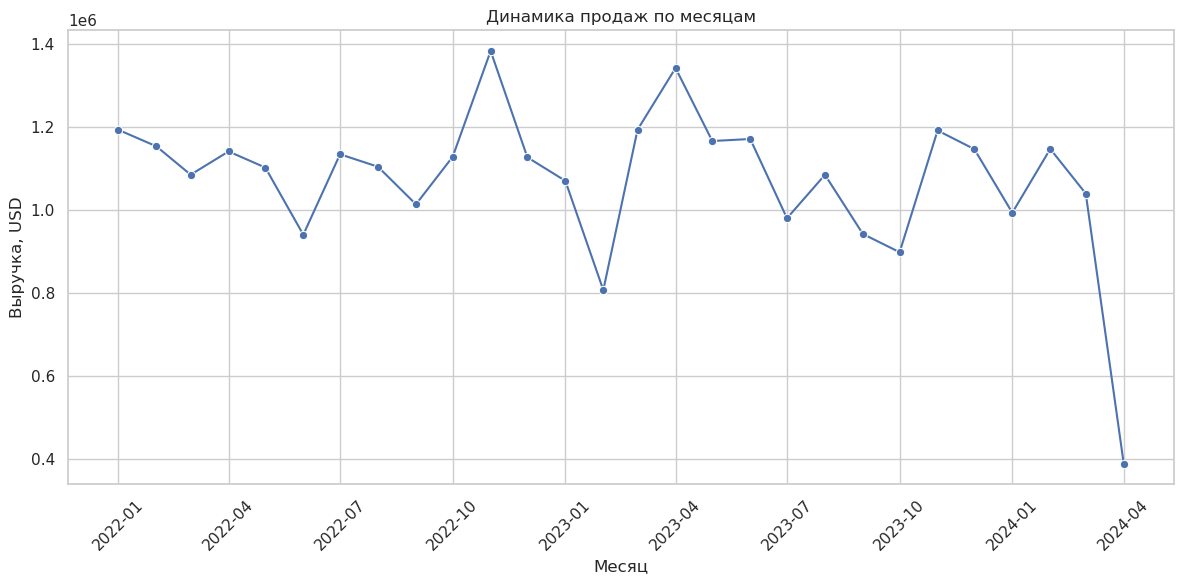

In [14]:
sales_by_month = df.groupby("month")["Sales_USD"].sum().reset_index()

plt.figure()
sns.lineplot(data=sales_by_month, x="month", y="Sales_USD", marker="o")
plt.title("Динамика продаж по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Выручка, USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
sales_by_country = (
    df.groupby("country2")["Sales_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

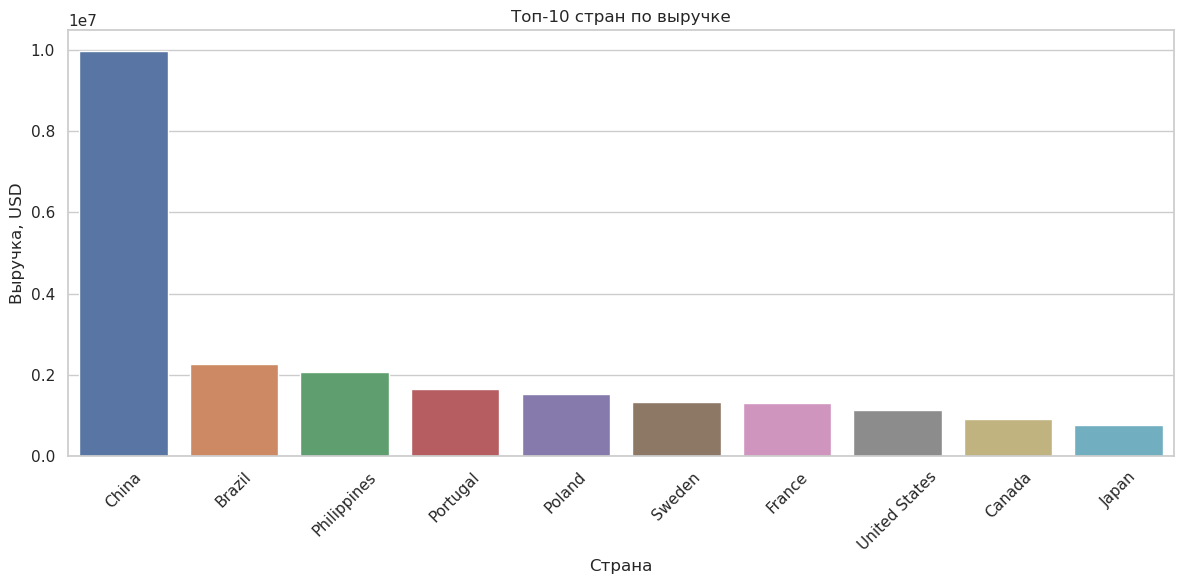

In [16]:
plt.figure()
sns.barplot(data=sales_by_country, x="country2", y="Sales_USD")
plt.title("Топ-10 стран по выручке")
plt.xlabel("Страна")
plt.ylabel("Выручка, USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
sales_by_family = (
    df.groupby("Product_Family")["Sales_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

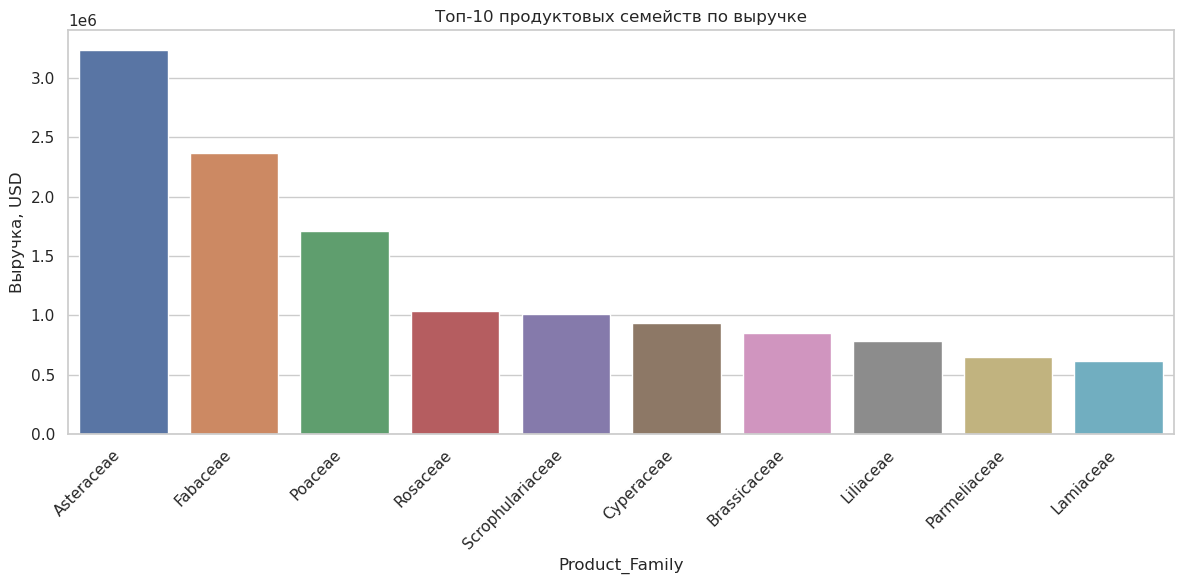

In [18]:
plt.figure()
sns.barplot(data=sales_by_family, x="Product_Family", y="Sales_USD")
plt.title("Топ-10 продуктовых семейств по выручке")
plt.xlabel("Product_Family")
plt.ylabel("Выручка, USD")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

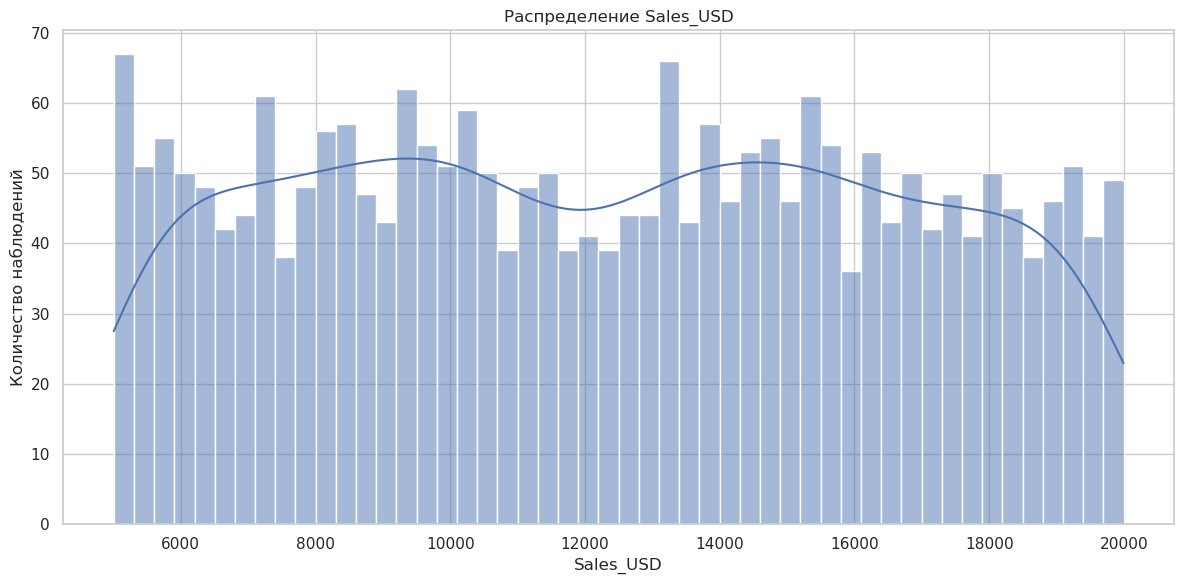

In [19]:
plt.figure()
sns.histplot(df["Sales_USD"], bins=50, kde=True)
plt.title("Распределение Sales_USD")
plt.xlabel("Sales_USD")
plt.ylabel("Количество наблюдений")
plt.tight_layout()
plt.show()

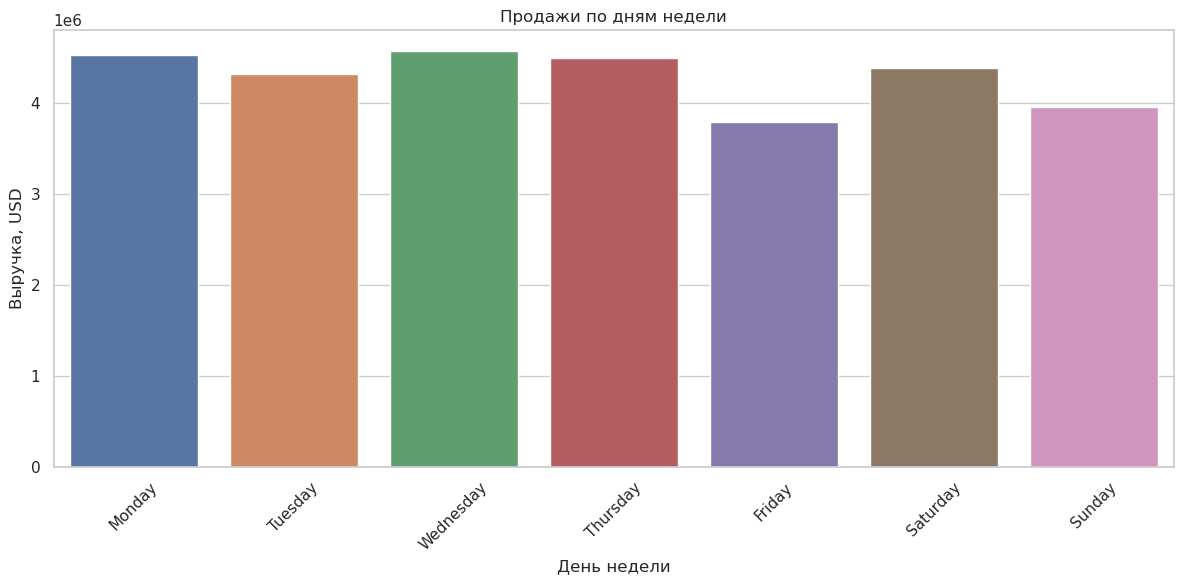

In [20]:
sales_by_weekday = (
    df.groupby("weekday")["Sales_USD"].sum().reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]))

plt.figure()
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values)
plt.title("Продажи по дням недели")
plt.xlabel("День недели")
plt.ylabel("Выручка, USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# 4. ABC-XYZ анализ продуктов

In [22]:
abc = (df.groupby("Product_Name")["Sales_USD"]
    .sum()
    .sort_values(ascending=False)
    .reset_index())

total_sales = abc["Sales_USD"].sum()
abc["share"] = abc["Sales_USD"] / total_sales
abc["cumshare"] = abc["share"].cumsum()

def abc_category(cum_share):
    if cum_share <= 0.8:
        return "A"
    elif cum_share <= 0.95:
        return "B"
    else:
        return "C"

abc["ABC"] = abc["cumshare"].apply(abc_category)

print("\nРаспределение по ABC-категориям:")
display(abc["ABC"].value_counts())


Распределение по ABC-категориям:


ABC
A    553
B    222
C    140
Name: count, dtype: int64

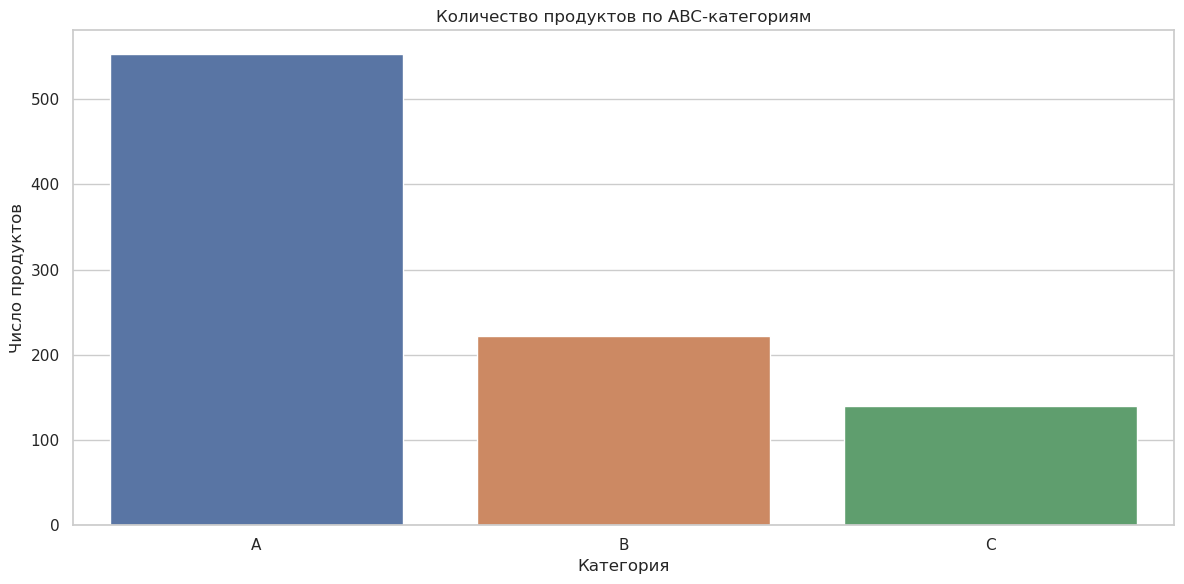

In [23]:
plt.figure()
sns.countplot(data=abc, x="ABC", order=["A", "B", "C"])
plt.title("Количество продуктов по ABC-категориям")
plt.xlabel("Категория")
plt.ylabel("Число продуктов")
plt.tight_layout()
plt.show()

In [24]:
monthly = df.groupby(["Product_Name", "month"])["Sales_USD"].sum().reset_index()

xyz = monthly.groupby("Product_Name")["Sales_USD"].agg(["mean", "std"]).reset_index()
xyz["cv"] = xyz["std"] / xyz["mean"]

def xyz_category(cv):
    if cv <= 0.1:
        return "X"
    elif cv <= 0.25:
        return "Y"
    else:
        return "Z"

xyz["XYZ"] = xyz["cv"].apply(xyz_category)

print("\nРаспределение по XYZ-категориям:")
display(xyz["XYZ"].value_counts())

# Объединим ABC и XYZ
abc_xyz = abc.merge(xyz[["Product_Name", "XYZ"]], on="Product_Name", how="left")

print("\nТаблица ABC-XYZ:")
display(abc_xyz.head())


Распределение по XYZ-категориям:


XYZ
Z    670
Y    159
X     86
Name: count, dtype: int64


Таблица ABC-XYZ:


,Product_Name,Sales_USD,share,cumshare,ABC,XYZ
0,Veronica prostrata L.,103373.05,0.003437,0.003437,A,Z
1,Pleurothallis domingensis Cogn.,93576.82,0.003111,0.006548,A,X
2,Typha angustifolia L.,92107.39,0.003062,0.009611,A,Y
3,Verbena urticifolia L. var. leiocarpa L.M. Per...,89288.14,0.002969,0.012580,A,Z
4,Epilobium glaberrimum Barbey ssp. glaberrimum,88998.85,0.002959,0.015539,A,Z


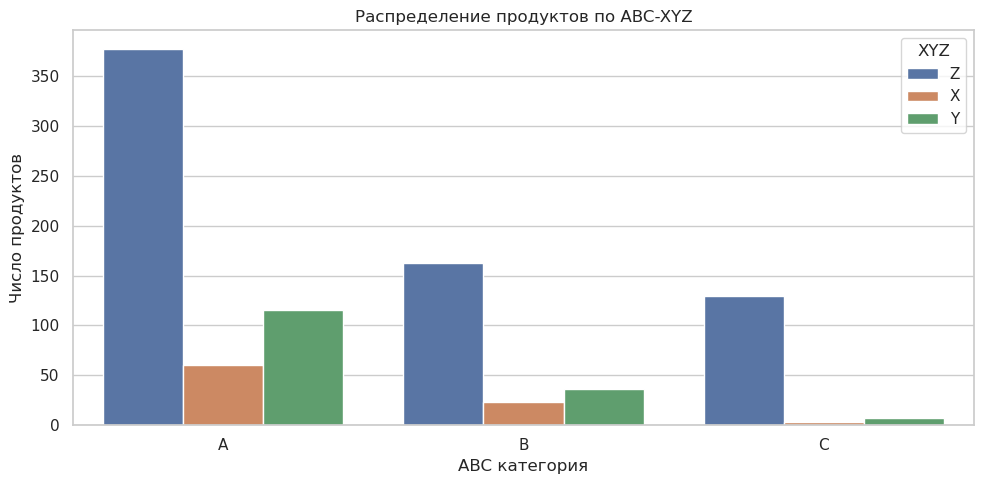

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=abc_xyz, x="ABC", hue="XYZ", order=["A", "B", "C"])
plt.title("Распределение продуктов по ABC-XYZ")
plt.xlabel("ABC категория")
plt.ylabel("Число продуктов")
plt.tight_layout()
plt.show()

In [26]:
# 5. RFM-анализ по клиентам

In [27]:
snapshot_date = df["Date_Time"].max() + pd.Timedelta(days=1)

rfm = df.groupby("Account_id").agg({
    "Date_Time": lambda x: (snapshot_date - x.max()).days,  
    "Sales_USD": "sum",                                     
    "Product_id": "count"                                   
})

rfm.rename(columns={
    "Date_Time": "Recency",
    "Sales_USD": "Monetary",
    "Product_id": "Frequency"
}, inplace=True)

display(rfm.head())

,Recency,Monetary,Frequency
Account_id,,,
1000-96500-000-4303,137,34529.13,3
1001--9563,15,15611.22,2
1002--7217,481,21096.38,2
1002-4213-1,129,49049.95,3
1003-59007 CEDEX-861,5,43196.41,3


In [28]:
rfm["R_score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1]) 
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

rfm["R_score"] = rfm["R_score"].astype(int)
rfm["F_score"] = rfm["F_score"].astype(int)
rfm["M_score"] = rfm["M_score"].astype(int)

rfm["RFM_Score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)

def rfm_segment(row):
    r, f, m = row["R_score"], row["F_score"], row["M_score"]
    if r == 4 and f >= 3 and m >= 3:
        return "Champions"
    elif r >= 3 and f >= 3:
        return "Loyal Customers"
    elif r >= 3 and f >= 2:
        return "Potential Loyalist"
    else:
        return "Others"

rfm["Segment"] = rfm.apply(rfm_segment, axis=1)

print("\nРаспределение клиентов по сегментам:")
display(rfm["Segment"].value_counts())


Распределение клиентов по сегментам:


Segment
Others                530
Loyal Customers       151
Champions             146
Potential Loyalist    121
Name: count, dtype: int64

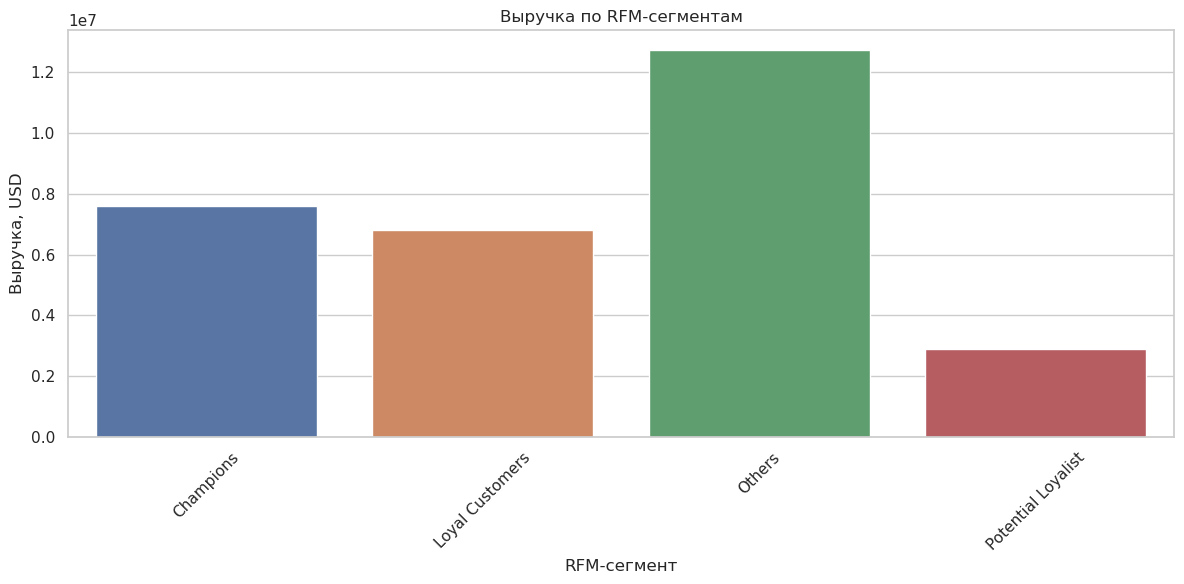

In [29]:
rfm_segment_sales = rfm.groupby("Segment")["Monetary"].sum().reset_index()

plt.figure()
sns.barplot(data=rfm_segment_sales, x="Segment", y="Monetary")
plt.title("Выручка по RFM-сегментам")
plt.xlabel("RFM-сегмент")
plt.ylabel("Выручка, USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# 6. Машинное обучение

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor
)

In [32]:
!pip install xgboost lime
from xgboost import XGBRegressor

from lime.lime_tabular import LimeTabularExplainer

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [33]:
plt.rcParams["figure.figsize"] = (10, 6)

LinearRegression  RMSE =    5599.79 | R2 = -0.593


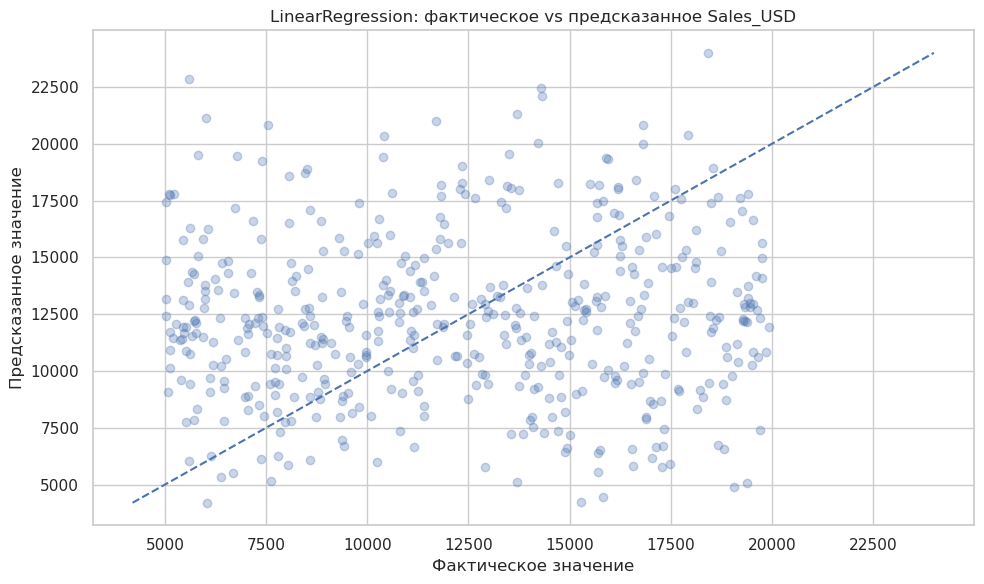

DecisionTree     RMSE =     811.63 | R2 =  0.967


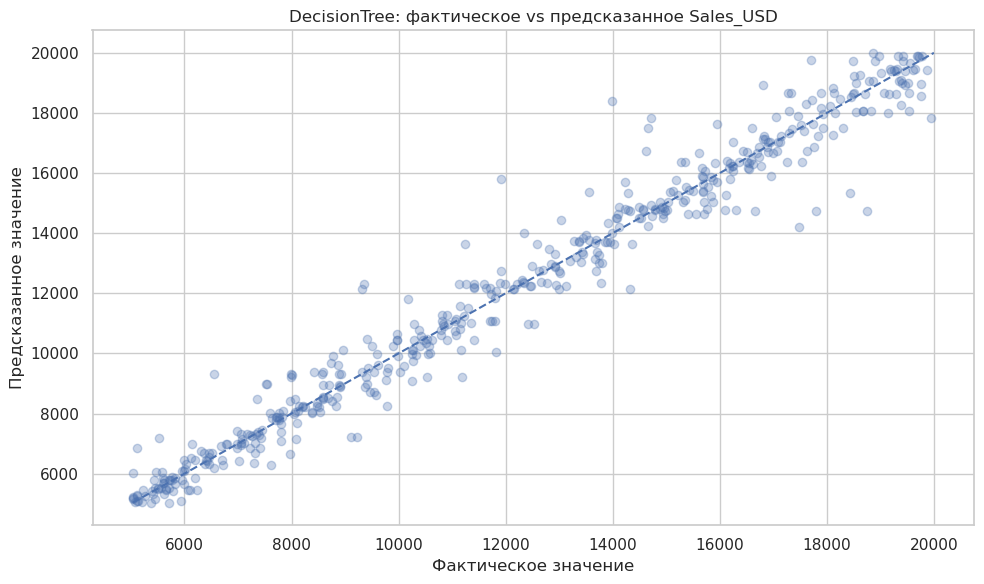

RandomForest     RMSE =     411.31 | R2 =  0.991


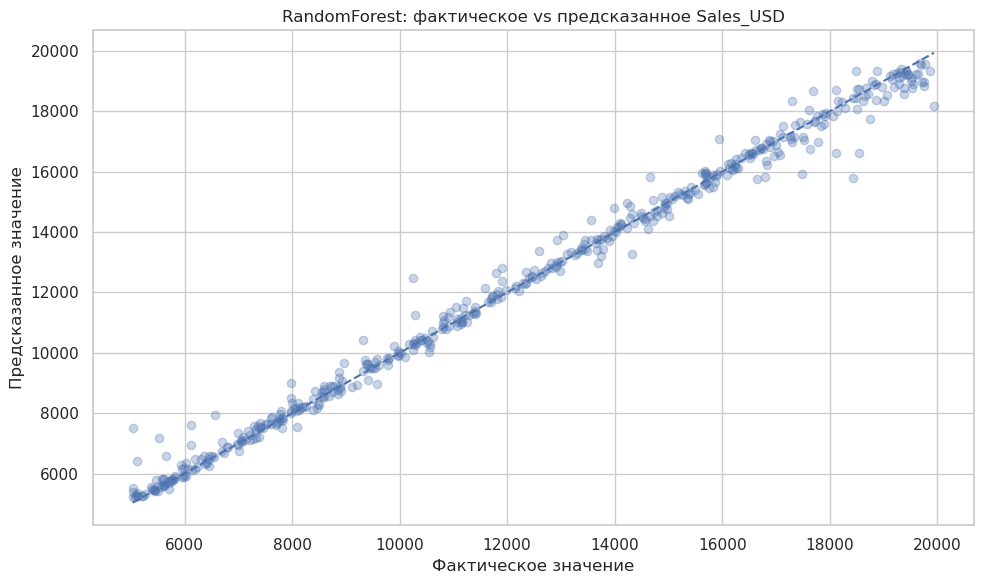

ExtraTrees       RMSE =     385.66 | R2 =  0.992


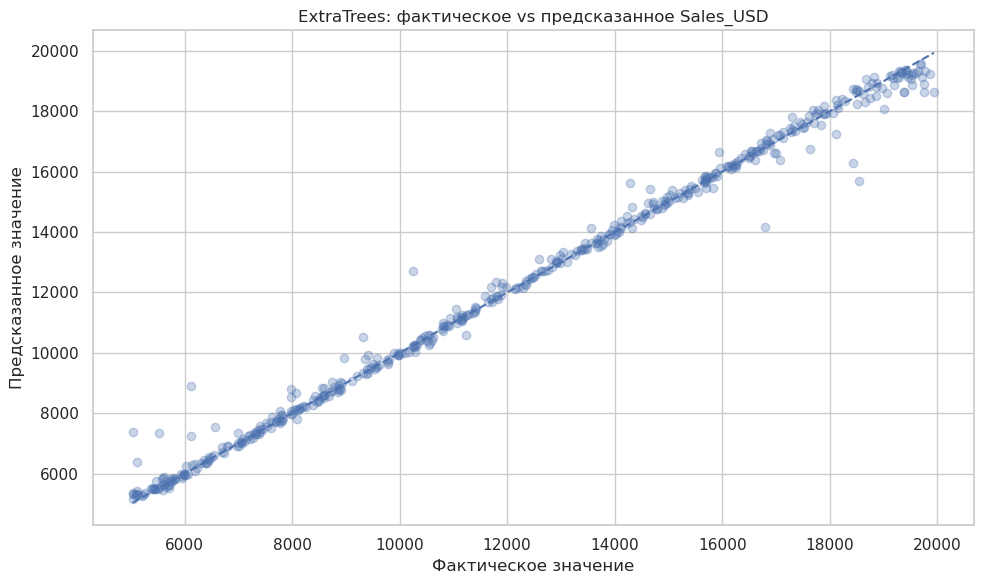

AdaBoost         RMSE =    2556.42 | R2 =  0.668


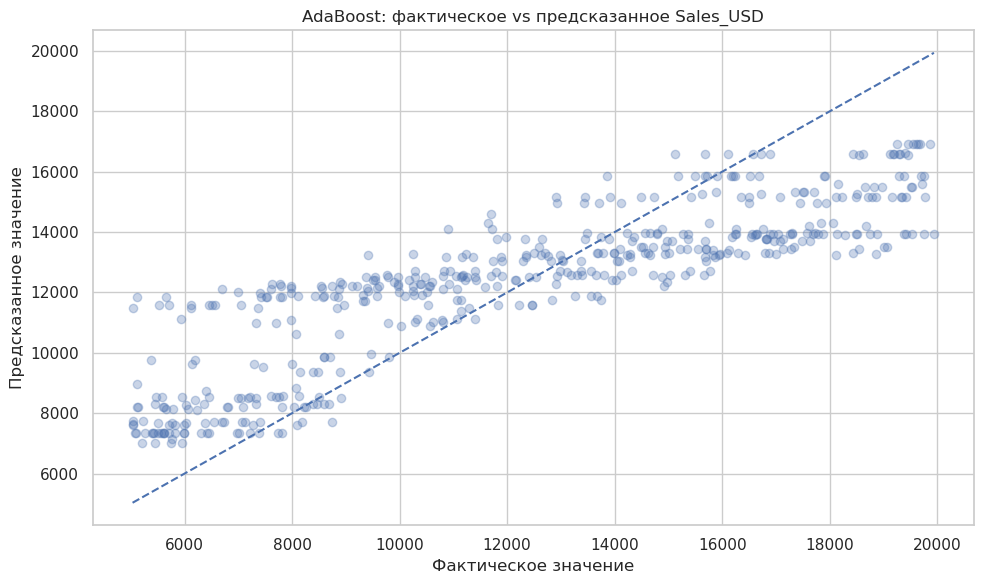

Bagging          RMSE =     405.50 | R2 =  0.992


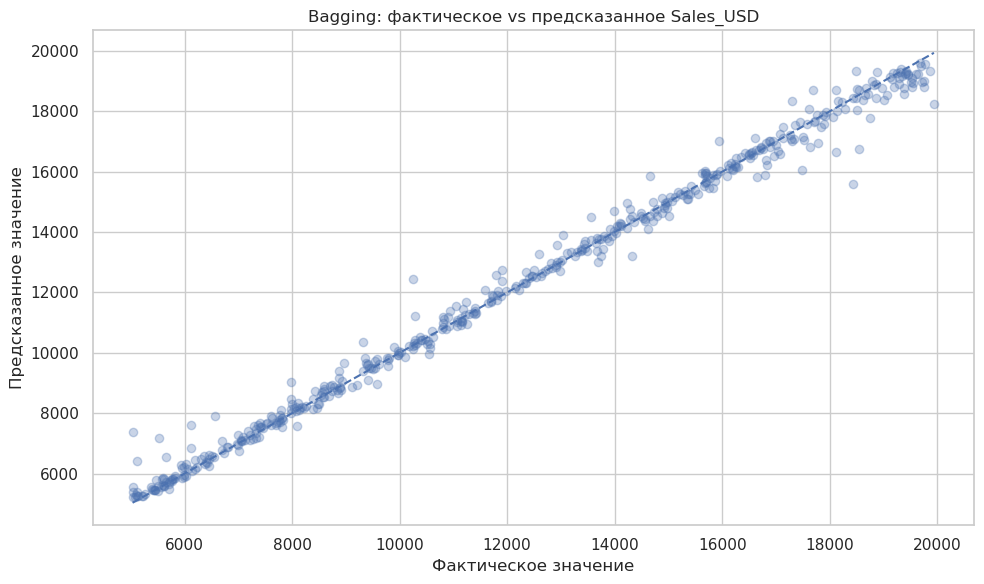

XGBoost          RMSE =     540.13 | R2 =  0.985


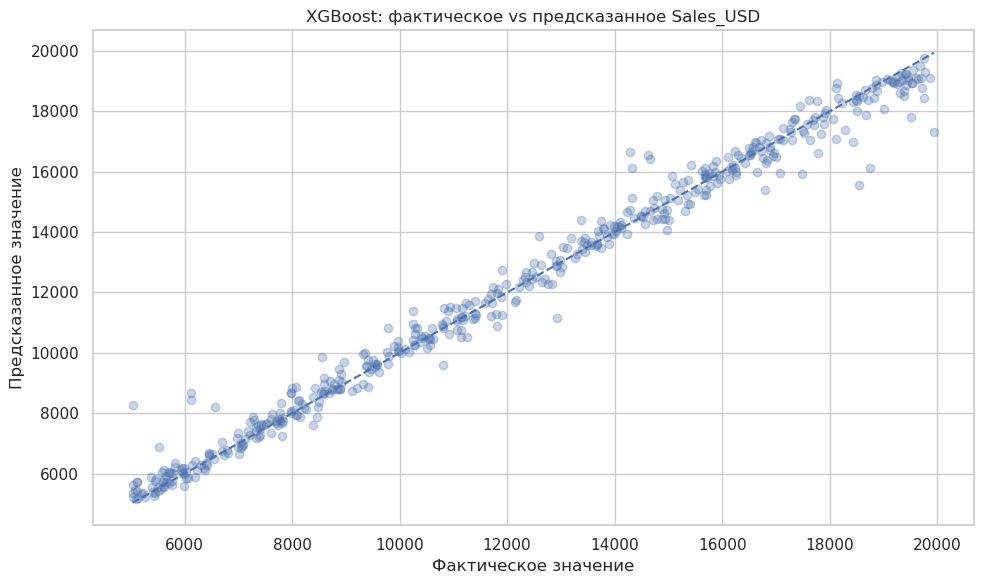


Лучшая модель по RMSE: ExtraTrees
RMSE: 385.6600846826544 R2: 0.9924443342508338


In [34]:
# А. Подготовка признаков и целевой переменной

numeric_features = ["quantity", "Price_USD"]
categorical_features = ["country_code", "Product_Family", "Product_Group"]

# Убедимся, что все колонки есть:
for col in numeric_features + categorical_features + ["Sales_USD"]:
    if col not in df.columns:
        raise ValueError(f"В df не найдена колонка: {col}")

ml_df = df.dropna(subset=numeric_features + ["Sales_USD"]).copy()

X = ml_df[numeric_features + categorical_features]
y = ml_df["Sales_USD"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Препроцессор: числовые пропускаем, категориальные → OneHot
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# В. Модели, метрики и графики "фактическое vs предсказанное"

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging": BaggingRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "model": name,
        "pipeline": pipe,
        "rmse": rmse,
        "r2": r2,
        "y_pred": y_pred
    })

    print(f"{name:15s}  RMSE = {rmse:10.2f} | R2 = {r2:6.3f}")

    # ---- ГРАФИК ДЛЯ КАЖДОЙ МОДЕЛИ: фактическое vs предсказанное ----
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.3)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
    plt.title(f"{name}: фактическое vs предсказанное Sales_USD")
    plt.xlabel("Фактическое значение")
    plt.ylabel("Предсказанное значение")
    plt.tight_layout()
    plt.show()

# Сортируем по RMSE и выбираем лучшую модель
results_sorted = sorted(results, key=lambda x: x["rmse"])
best = results_sorted[0]
best_name = best["model"]
best_pipe = best["pipeline"]

print("\nЛучшая модель по RMSE:", best_name)
print("RMSE:", best["rmse"], "R2:", best["r2"])

In [35]:
# 7. Объяснение модели: SHAP, LIME, PDP
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [36]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


/tmp/ipykernel_124/3634827407.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


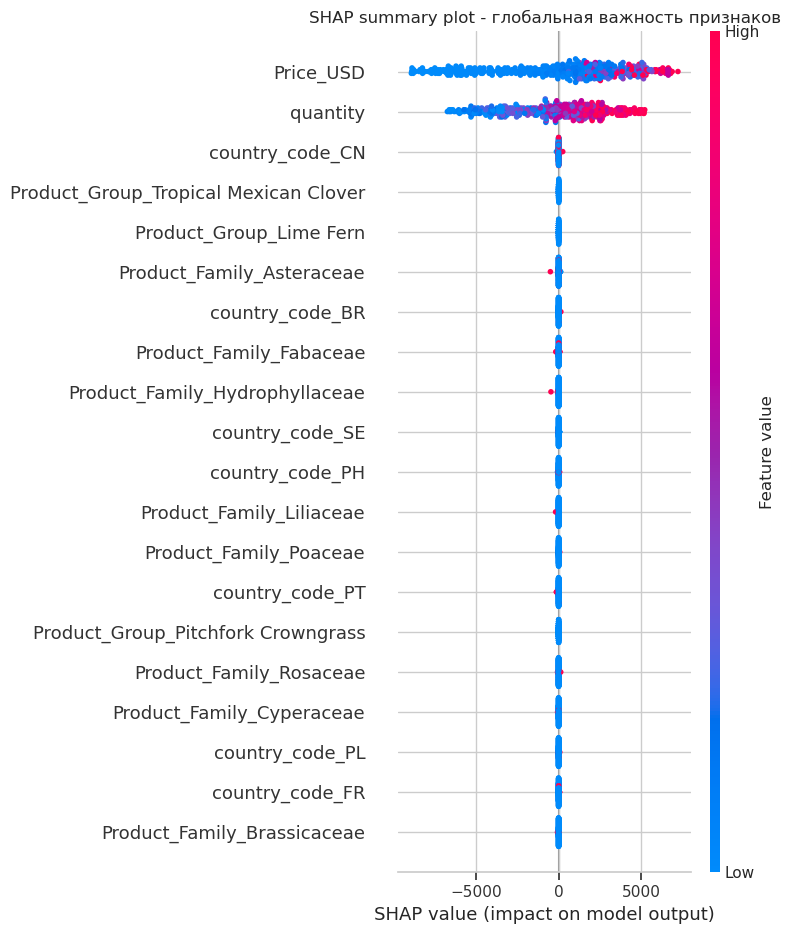

/tmp/ipykernel_124/3634827407.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


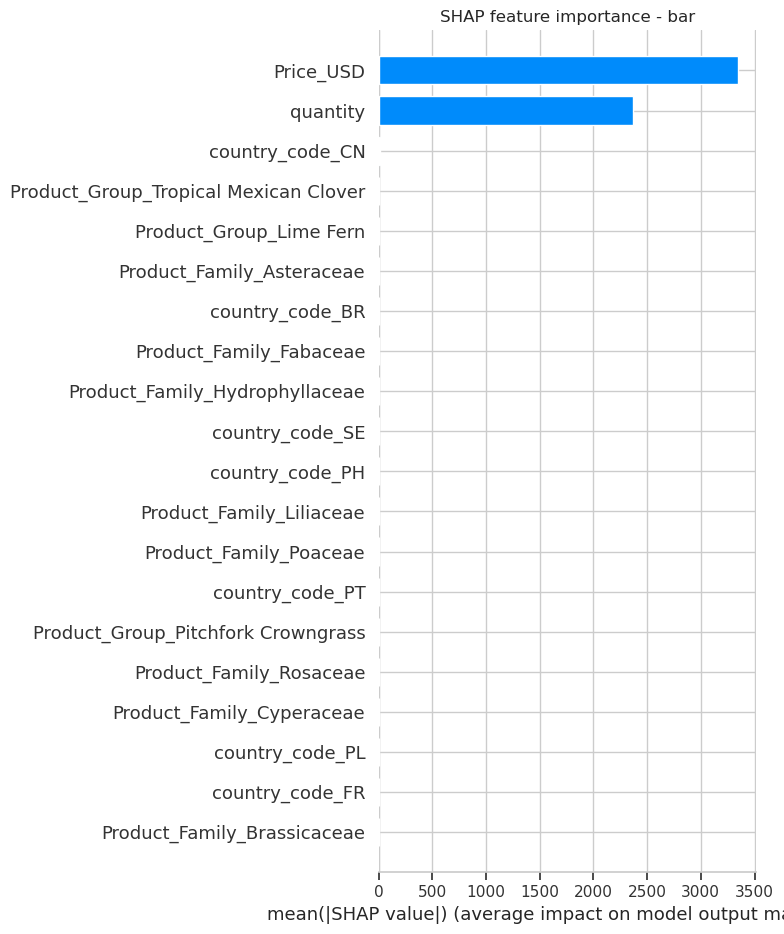

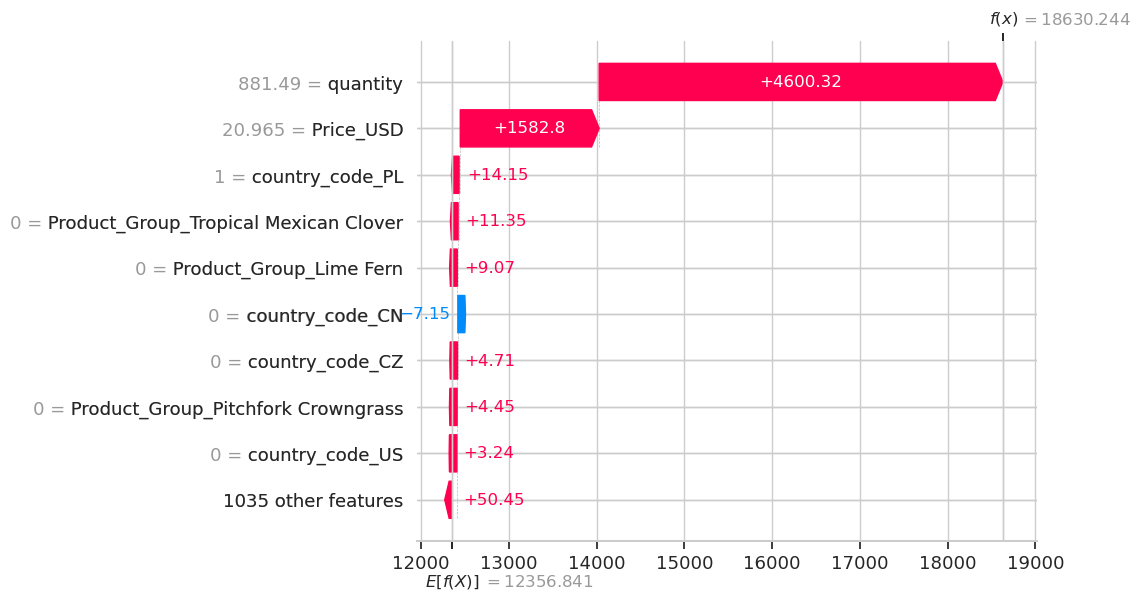

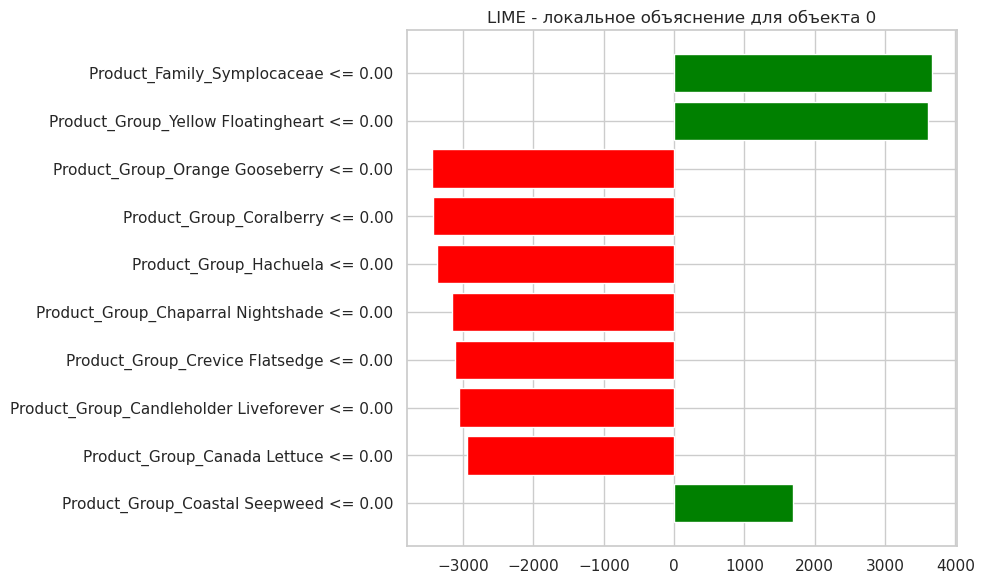

<Figure size 1000x600 with 0 Axes>

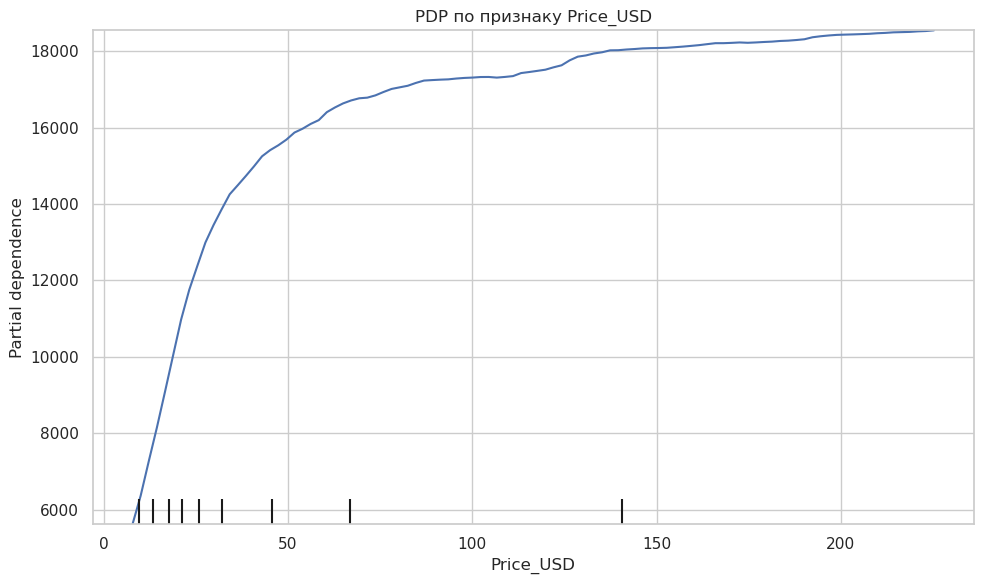

<Figure size 1000x600 with 0 Axes>

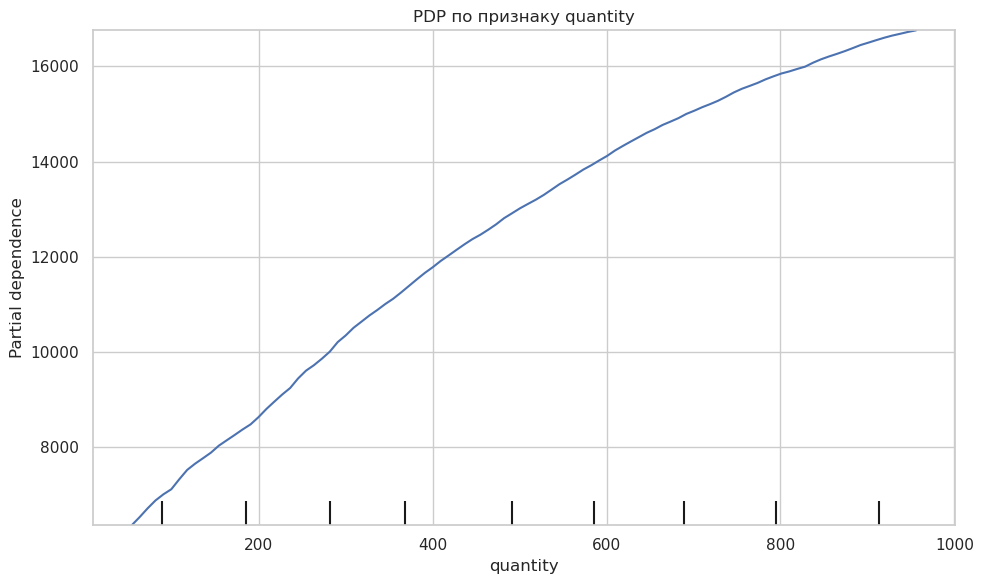

In [42]:
# Извлекаем из пайплайна препроцессор и саму модель
preprocessor = best_pipe.named_steps["preprocess"]
model = best_pipe.named_steps["model"]

# Преобразуем train и test в числовое пространство (после OneHot)
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Восстанавливаем имена всех признаков после OneHot
feature_names_num = list(numeric_features)

cat_transformer = preprocessor.named_transformers_["cat"]
if hasattr(cat_transformer, "get_feature_names_out"):
    feature_names_cat = cat_transformer.get_feature_names_out(categorical_features).tolist()
else:
    feature_names_cat = cat_transformer.get_feature_names(categorical_features)

feature_names_all = feature_names_num + feature_names_cat

# Если матрица sparse, делаем плотную для некоторых библиотек
def to_dense(X):
    return X.toarray() if hasattr(X, "toarray") else np.array(X)

X_train_dense = to_dense(X_train_trans)
X_test_dense = to_dense(X_test_trans)

#2. SHAP – глобальная и локальная важность

import shap

explainer_shap = shap.TreeExplainer(model)

shap_values = explainer_shap.shap_values(X_test_dense)

# Глобальная важность (summary plot)
plt.figure()
shap.summary_plot(shap_values, X_test_dense, feature_names=feature_names_all, show=False)
plt.title("SHAP summary plot - глобальная важность признаков")
plt.tight_layout()
plt.show()

# Бар-диаграмма глобальной важности
plt.figure()
shap.summary_plot(shap_values, X_test_dense, feature_names=feature_names_all, plot_type="bar", show=False)
plt.title("SHAP feature importance - bar")
plt.tight_layout()
plt.show()

# Локальное объяснение для одного объекта
index_example = 0  # можно поменять
plt.figure()
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[index_example],
        base_values=explainer_shap.expected_value,
        data=X_test_dense[index_example],
        feature_names=feature_names_all,
    )
)

#3. LIME – локальное объяснение

from lime.lime_tabular import LimeTabularExplainer

explainer_lime = LimeTabularExplainer(
    training_data=X_train_dense,
    feature_names=feature_names_all,
    mode="regression"
)

instance_id = 0  # объект, который объясняем
exp = explainer_lime.explain_instance(
    X_test_dense[instance_id],
    model.predict,
    num_features=10
)

fig = exp.as_pyplot_figure()
plt.title(f"LIME - локальное объяснение для объекта {instance_id}")
plt.tight_layout()
plt.show()

#4. PDP – частные зависимости (глобальное влияние признака)

from sklearn.inspection import PartialDependenceDisplay

plt.figure()
PartialDependenceDisplay.from_estimator(
    best_pipe,             
    X_test,                
    features=["Price_USD"], 
)
plt.title("PDP по признаку Price_USD")
plt.tight_layout()
plt.show()

plt.figure()
PartialDependenceDisplay.from_estimator(
    best_pipe,
    X_test,
    features=["quantity"],
)
plt.title("PDP по признаку quantity")
plt.tight_layout()
plt.show()

In [38]:
# 8. Итоговый дашборд

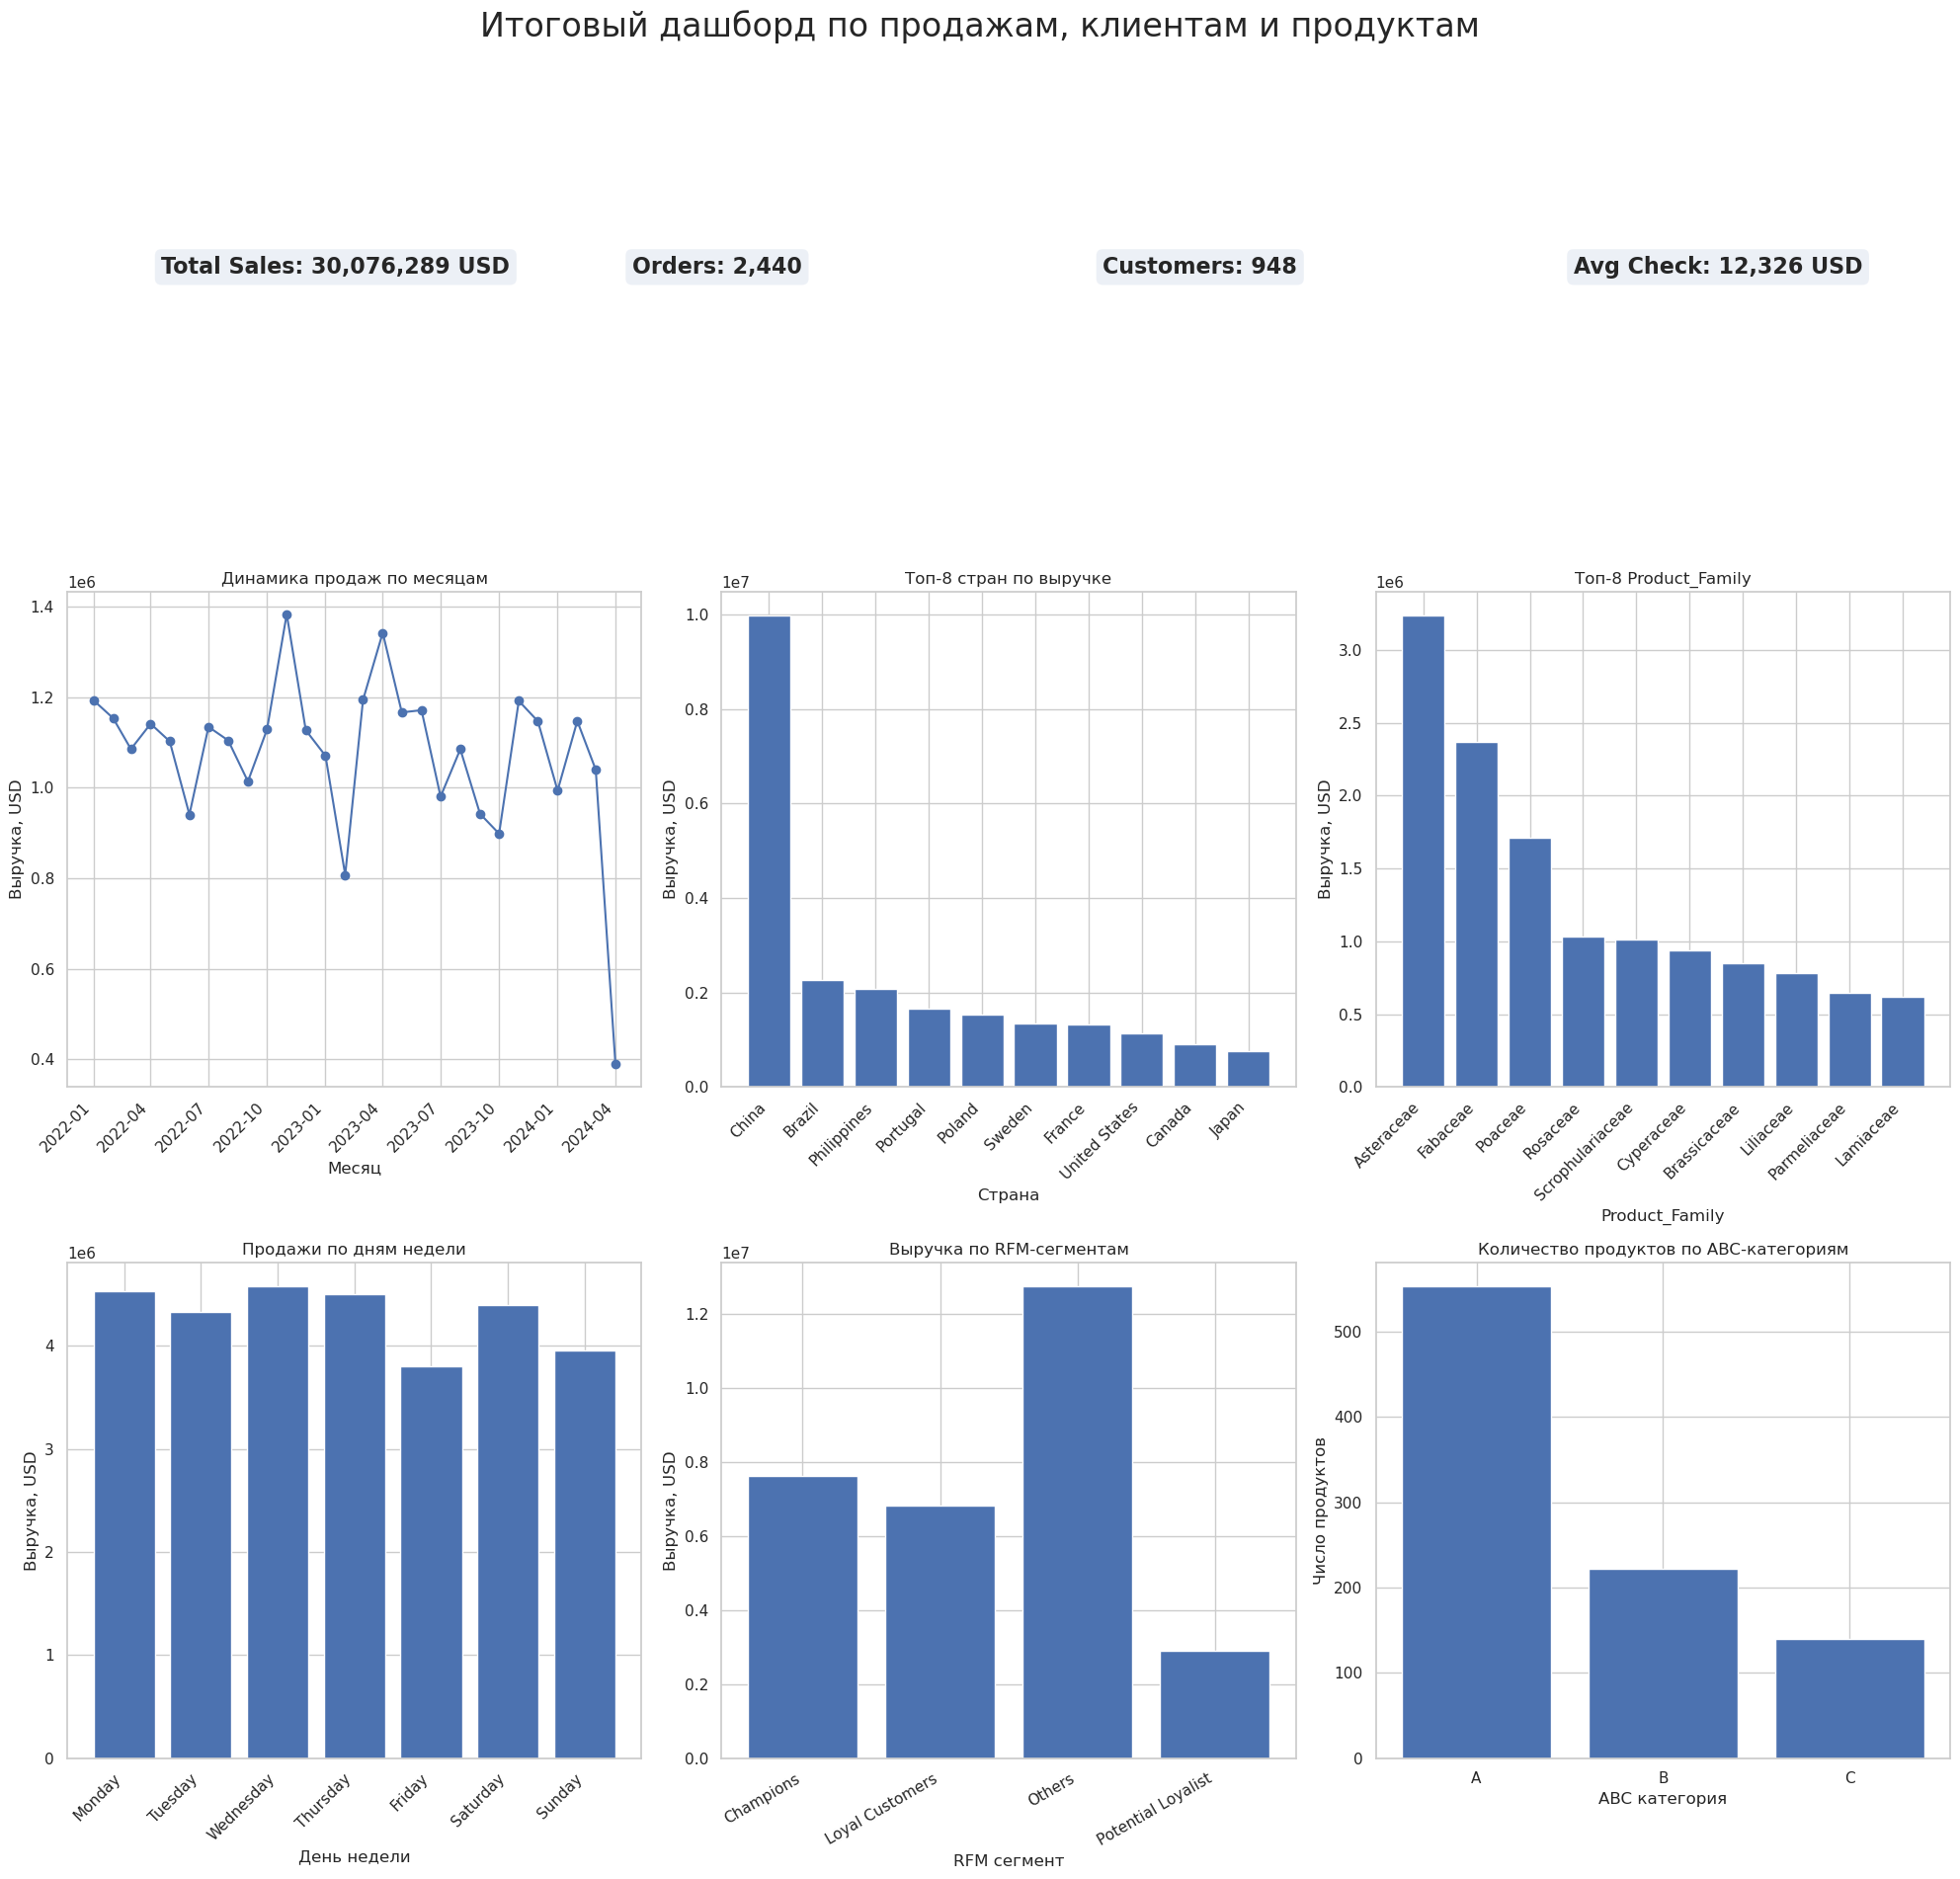

In [39]:
def build_final_dashboard(df, rfm, abc_xyz, top_n_countries=8, top_n_families=8):
    """
    df       – транзакционный датасет (c полями Sales_USD, quantity, date/month, weekday, country_code, Product_Family)
    rfm      – таблица RFM по клиентам (c полями Segment, Monetary)
    abc_xyz  – таблица ABC-XYZ по продуктам (c полями Product_Name, ABC, XYZ)
    """

  
    # KPI-блоки
 
    total_sales = df["Sales_USD"].sum()
    total_orders = len(df)
    total_customers = df["Account_id"].nunique() if "Account_id" in df.columns else np.nan
    avg_check = total_sales / total_orders if total_orders > 0 else np.nan

    fig = plt.figure(figsize=(20, 20))
    fig.suptitle("Итоговый дашборд по продажам, клиентам и продуктам", fontsize=24, y=0.95)

    # Сетка 3x3:
    # (1) KPI-панель (во всю ширину)
    # (2) Продажи по месяцам
    # (3) Топ стран
    # (4) Топ продуктовых семейств
    # (5) Продажи по дням недели
    # (6) RFM-сегменты
    # (7) ABC-категории

    grid = fig.add_gridspec(3, 3, height_ratios=[0.9, 1.5, 1.5])

    # --- 1. KPI-панель (верхняя строка, объединяем три колонки) ---
    ax_kpi = fig.add_subplot(grid[0, :])

    ax_kpi.axis("off")

    kpi_text = [
        f"Total Sales: {total_sales:,.0f} USD",
        f"Orders: {total_orders:,}",
        f"Customers: {total_customers:,}" if not np.isnan(total_customers) else "Customers: N/A",
        f"Avg Check: {avg_check:,.0f} USD" if not np.isnan(avg_check) else "Avg Check: N/A",
    ]

    # Рисуем KPI как текстовые блоки
    x_positions = [0.05, 0.3, 0.55, 0.8]
    for x, text in zip(x_positions, kpi_text):
        ax_kpi.text(
            x, 0.5, text,
            transform=ax_kpi.transAxes,
            fontsize=16,
            fontweight="bold",
            verticalalignment="center",
            bbox=dict(boxstyle="round", alpha=0.1)
        )

    # --- 2. Продажи по месяцам ---
    ax1 = fig.add_subplot(grid[1, 0])
    ax1.plot(sales_by_month["month"], sales_by_month["Sales_USD"], marker="o")
    ax1.set_title("Динамика продаж по месяцам")
    ax1.set_xlabel("Месяц")
    ax1.set_ylabel("Выручка, USD")
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    # --- 3. Топ стран по выручке ---
    ax2 = fig.add_subplot(grid[1, 1])
    ax2.bar(sales_by_country["country2"], sales_by_country["Sales_USD"])
    ax2.set_title(f"Топ-{top_n_countries} стран по выручке")
    ax2.set_xlabel("Страна")
    ax2.set_ylabel("Выручка, USD")
    for label in ax2.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    # --- 4. Топ продуктовых семейств ---
    ax3 = fig.add_subplot(grid[1, 2])
    ax3.bar(sales_by_family["Product_Family"], sales_by_family["Sales_USD"])
    ax3.set_title(f"Топ-{top_n_families} Product_Family")
    ax3.set_xlabel("Product_Family")
    ax3.set_ylabel("Выручка, USD")
    for label in ax3.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    # --- 5. Продажи по дням недели ---
    ax4 = fig.add_subplot(grid[2, 0])
    ax4.bar(sales_by_weekday.index, sales_by_weekday.values)
    ax4.set_title("Продажи по дням недели")
    ax4.set_xlabel("День недели")
    ax4.set_ylabel("Выручка, USD")
    for label in ax4.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    # --- 6. Выручка по RFM-сегментам ---
    ax5 = fig.add_subplot(grid[2, 1])
    ax5.bar(rfm_segment_sales["Segment"], rfm_segment_sales["Monetary"])
    ax5.set_title("Выручка по RFM-сегментам")
    ax5.set_xlabel("RFM сегмент")
    ax5.set_ylabel("Выручка, USD")
    for label in ax5.get_xticklabels():
        label.set_rotation(30)
        label.set_ha("right")

    # --- 7. Распределение ABC-категорий ---
    abc_counts = abc_xyz["ABC"].value_counts().reindex(["A", "B", "C"])
    ax6 = fig.add_subplot(grid[2, 2])
    ax6.bar(abc_counts.index, abc_counts.values)
    ax6.set_title("Количество продуктов по ABC-категориям")
    ax6.set_xlabel("ABC категория")
    ax6.set_ylabel("Число продуктов")

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()



build_final_dashboard(df, rfm, abc_xyz)

In [40]:
df.head()

,Product_id,Sales_USD,quantity,Price_USD,COGS_USD,Date_Time,Account_id,country_code,Account,Master_id,...,Product_Family_Id,Product_Group,Product_Group_id,Product_Name,Product_Name_id,Product_Size,Produt_Type,date,month,weekday
0,2625,16156.56,502.00,32.184382,14104.67688,2024-03-29,1599-E6G-78670,CA,"Gerlach, Cassin and Parker",1599,...,1122,New Mexico Beeblossom,3600,"Lycopodium hickeyi W.H. Wagner, Beitel & Moran",2625,Medium,Landscape,2024-03-29,2024-03-01,Friday
1,2569,13831.29,679.92,20.342526,10470.28653,2022-07-13,1227--40,CN,Ziemann LLC,1227,...,1117,Mountainbay,3577,Allium cernuum Roth var. neomexicanum (Rydb.) ...,2569,Large,Indoor,2022-07-13,2022-07-01,Wednesday
2,2195,17402.14,925.66,18.799710,10528.29470,2023-04-05,1857--758,CN,"Medhurst, Aufderhar and Mosciski",1857,...,1037,Falseteeth,3238,Cuscuta epithymum (L.) L.,2195,Small,Indoor,2023-04-05,2023-04-01,Wednesday
3,2530,15866.42,809.78,19.593495,12883.53304,2022-09-24,1793-6140-77,AR,Larson-Fritsch,1793,...,1143,Waldo Buckwheat,3749,Penstemon davidsonii Greene var. menziesii (D....,2530,Large,Landscape,2022-09-24,2022-09-01,Saturday
4,2889,6200.48,311.43,19.909707,5388.21712,2023-10-19,1725-40230-69,MX,Jast-Quigley,1725,...,1066,Arcane Milkvetch,3369,Chaerophyllum bulbosum L.,2889,Large,Outdoor,2023-10-19,2023-10-01,Thursday


In [41]:
df.to_csv("Plants_dataset.csv", index=False, encoding="utf-8")